In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('datasets/uncontrollable_sample.csv', index_col='id')
df.shape

(20068, 229)

# I. Uncontrollable

## Baseline Random Forest: without neighborhood features

In [181]:
df_wo = df[['idpop_local_sum', 'idpop_citywide_sum', 'idpop_local_food_sum',
       'idpop_citywide_food_sum', 'idpop_local_nightlife_sum',
       'idpop_citywide_nightlife_sum', 'idpop_local_travel_sum',
       'idpop_citywide_travel_sum', 'venue_count_500m', 'sub_cnt_20m',
       'sub__line_cnt_20m', 'comp', 'comp_hotel',
       'Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode',
       'Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011',
       'Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011',
       'Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011',
       'Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011',
       'Demo % - Age - Age 60 + - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011',
       'Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011',
       'Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011',
       'Demo % - Population - Female Population - Zipcode - ACS 2011',
       'Demo % - Population - Male Population - Zipcode - ACS 2011',
       'Demo - Age - Median Age Total Population - Zipcode - ACS 2011',
       'Demo - Households - Median Household Income - Zipcode - ACS 2011',
       'Demo - Population Density - Total - Zipcode - ACS 2011', 'Label']]

In [351]:
train,test = train_test_split(df_wo, train_size=.80)

rf_def = RandomForestClassifier()
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])
rf_pred = rf_def.predict_proba(test.drop('Label',1))

#Make predictions for both training and test data
predictions_train=rf_def.predict(train.drop(['Label'], 1))
predictions_test=rf_def.predict(test.drop(['Label'], 1))

#Compute accuracies
train_accuracy=accuracy_score(train['Label'],predictions_train)
test_accuracy=accuracy_score(test['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9998131306839417
Test Accuracy is 0.5430991529646239


In [353]:
X_train = train.drop('Label',1)
Y_train = train['Label']

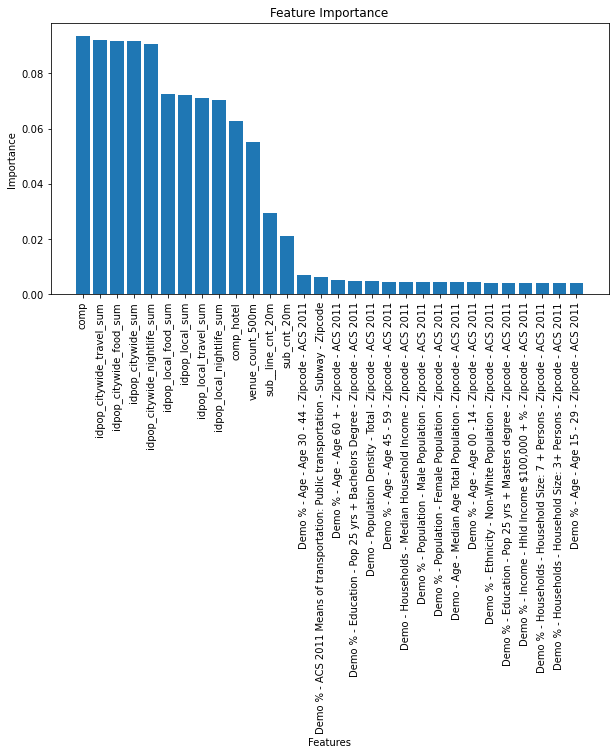

In [354]:
#Get feature importances
feature_mi = rf_def.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1][0:30]],feature_mi[featureinds[::-1][0:30]])
plt.xticks(X_train.columns.values[featureinds[::-1][0:30]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

### Baseline Random Forest: with neighborhood features

In [355]:
train,test = train_test_split(df, train_size=.80)

In [356]:
from sklearn.ensemble import RandomForestClassifier
#rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_leaf=61,min_samples_split=1402)
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])
rf_pred = rf_def.predict_proba(test.drop('Label',1))

In [357]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=rf_def.predict(train.drop(['Label'], 1))
predictions_test=rf_def.predict(test.drop(['Label'], 1))

#Compute accuracies
train_accuracy=accuracy_score(train['Label'],predictions_train)
test_accuracy=accuracy_score(test['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9998131306839417
Test Accuracy is 0.554559043348281


In [348]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

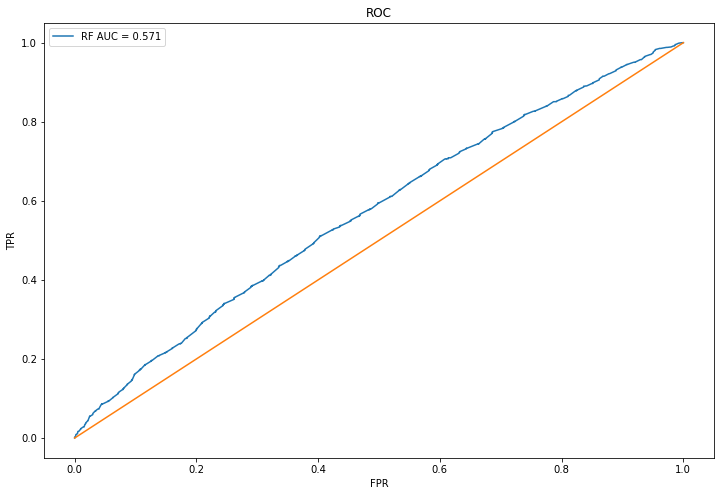

In [358]:
plt.figure(figsize=(12,8))

fpr, tpr, thresholds = metrics.roc_curve(test['Label'], rf_pred[:,1])
auc = metrics.auc(fpr,tpr)
label = "RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

#### Out of Bag Error

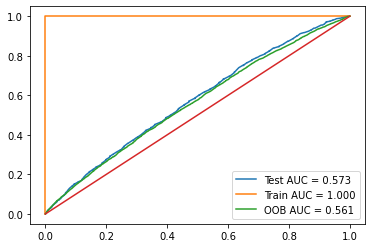

In [81]:
rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100, oob_score=True)
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])
rf_pred_test = rf_def.predict_proba(test.drop(['Label'],1))
rf_pred_train = rf_def.predict_proba(train.drop(['Label'],1))

plt.show()

fpr, tpr, thresholds = metrics.roc_curve(test['Label'], rf_pred_test[:,1])
test_auc = metrics.auc(fpr,tpr)
label = "Test AUC = %.3f"%test_auc
plt.plot(fpr,tpr,label = label)

fpr, tpr, thresholds = metrics.roc_curve(train['Label'], rf_pred_train[:,1])
train_auc = metrics.auc(fpr,tpr)
label = "Train AUC = %.3f"%train_auc
plt.plot(fpr,tpr,label = label)

fpr, tpr, thresholds = metrics.roc_curve(train['Label'], rf_def.oob_decision_function_[:,1])
oob_auc = metrics.auc(fpr,tpr)
label = "OOB AUC = %.3f"%oob_auc
plt.plot(fpr,tpr,label = label)


label = ['Test','Train','OOB']
plt.plot([0,1],[0,1])
plt.legend()


#plt.plot(fpr,tpr,label = label)


## Tuning

#### Leaf and Node Sizes

In [83]:
# from Faizan DT
#Max AUC: 0.5865431538797775
#Best Minimum Leaf Size: 61
#Best Minimum Samples for Split: 1402

#### Number of Trees and Number of Features

In [327]:
n_est = [50, 100, 200, 500, 1000]
m_feat = [1, 3, 6, 11]


aucs_oob = {}
aucs_test = {}

for m in m_feat:
    aucs_oob[m] = []
    aucs_test[m] = []
    for n in n_est:
        rf_oob = RandomForestClassifier(criterion='entropy', n_estimators=n, max_features=m, oob_score=True,min_samples_leaf=61,min_samples_split=1402)
        rf_oob = rf_oob.fit(train.drop(['Label'], 1), train['Label'])
        aucs_oob[m].append(roc_auc_score(train['Label'], rf_oob.oob_decision_function_[:,1]))
        aucs_test[m].append(roc_auc_score(test['Label'], rf_oob.predict_proba(test.drop(['Label'],1))[:,1]))
        
        
ls_trees = aucs_oob[max(aucs_oob)] == max(aucs_oob[max(aucs_oob)])
ind = [i for i, x in enumerate(ls_trees) if x]

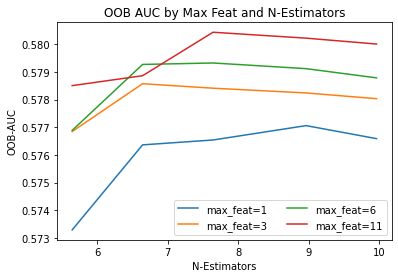

In [328]:
#We'll plot in this block

x = np.log2(np.array(n_est))
for m in m_feat:
    plt.plot(x, aucs_oob[m], label='max_feat={}'.format(m))
    
plt.title('OOB AUC by Max Feat and N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('OOB-AUC')
plt.legend(loc=4, ncol=2, prop={'size':10})
plt.show()

In [329]:
print("OOB Max AUC: " + str(max(aucs_oob[max(aucs_oob)])))
print("OOB Best N_features: " + str(max(aucs_oob)))
print("OOB Best N_estimators: " + str(n_est[ind[0]]))

OOB Max AUC: 0.58043622172804
OOB Best N_features: 11
OOB Best N_estimators: 200


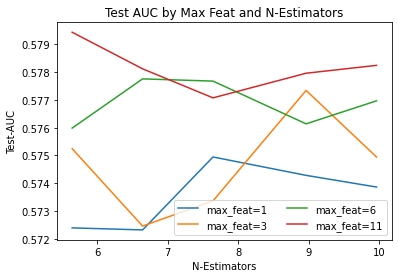

In [333]:
x = np.log2(np.array(n_est))
for m in m_feat:
    plt.plot(x, aucs_test[m], label='max_feat={}'.format(m))
    
plt.title('Test AUC by Max Feat and N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('Test-AUC')
plt.legend(loc=4, ncol=2, prop={'size':10})
plt.show()

## GridSearch (with neighbourhood features)

In [92]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Creating an standardscaler object
std_slc = StandardScaler()

# Creating a random forest classifier
rf_def = RandomForestClassifier()

In [95]:
# Creating a pipeline of two steps. First, standardizing the data.
# Second, training a RF Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def)])

In [131]:
# Creating lists of parameter for Decision Tree Classifier
n_estimator = np.arange(50,200,10)


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__n_estimators=n_estimator)

In [132]:
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])

Best n_estimators: 150


In [144]:
max_features = np.arange(1,100,10)
n_est = [150]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,rf_def__n_estimators=n_est)

In [145]:
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])

Best max_features: 91


In [148]:
#min_samples_split_values = [1000,1500,2000]
min_samples_leaf_values = np.arange(1,200,20)
max_features = [91]
n_est = [150]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est,
                  rf_def__min_samples_leaf=min_samples_leaf_values)

In [149]:
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_leaf'])

Best mi_samples_leaf: 161


In [151]:
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = [161]
max_features = [91]
n_est = [150]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est,
                  rf_def__min_samples_leaf=min_samples_leaf_values,
                  rf_def__min_samples_split=min_samples_split_values)

In [152]:
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_split'])

Best mi_samples_split: 352


In [170]:
rf_def = RandomForestClassifier(max_features=91, min_samples_leaf=161, n_estimators=200,min_samples_split=352)
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])

predictions_train=rf_def.predict(train.drop(['Label'], 1))
predictions_test=rf_def.predict(test.drop(['Label'], 1))

#Compute accuracies
train_accuracy=accuracy_score(train['Label'],predictions_train)
test_accuracy=accuracy_score(test['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.594929612557618
Test Accuracy is 0.5563029397110114


#### AUC for GridSearch Uncontrollable Model

In [362]:
rf_def = RandomForestClassifier(max_features=91, min_samples_leaf=161, n_estimators=200,min_samples_split=352,oob_score=True)
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])
rf_pred = rf_def.predict_proba(test.drop('Label',1))

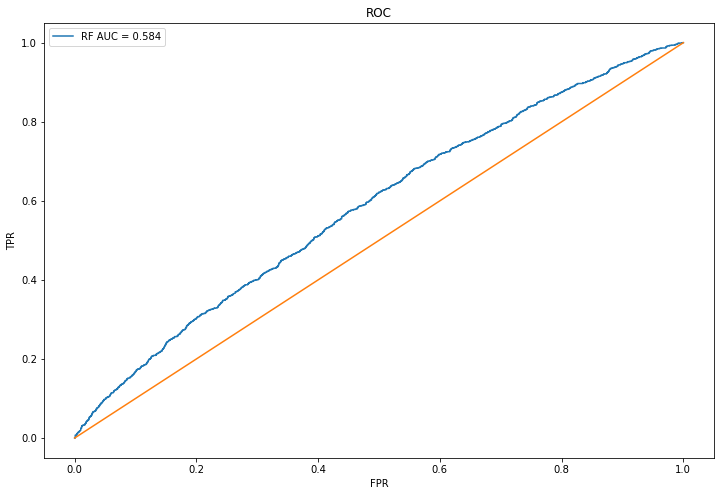

In [363]:
plt.figure(figsize=(12,8))

fpr, tpr, thresholds = metrics.roc_curve(test['Label'], rf_pred[:,1])
auc = metrics.auc(fpr,tpr)
label = "RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

AUC using OOB = True or False are the same. This AUC is only 0.04 above the earlier model iterating through a small list of hyperparameter options.

## II. Controllable Random Forest

In [368]:
df_cont = pd.read_csv('https://raw.githubusercontent.com/audreychu/Airbnb_Optimization/main/datasets/controllable_sampled.csv', index_col='id')
df_cont.shape

(19905, 69)

In [369]:
train_cont,test_cont = train_test_split(df_cont, train_size=.80)

In [370]:
rf_def_cont = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_def_cont = rf_def_cont.fit(train_cont.drop(['Label'], 1), train_cont['Label'])
rf_pred_cont = rf_def_cont.predict_proba(test_cont.drop('Label',1))

In [371]:
#Make predictions for both training and test data
predictions_train_cont=rf_def_cont.predict(train_cont.drop(['Label'], 1))
predictions_test_cont=rf_def_cont.predict(test_cont.drop(['Label'], 1))

#Compute accuracies
train_accuracy_cont=accuracy_score(train_cont['Label'],predictions_train_cont)
test_accuracy_cont=accuracy_score(test_cont['Label'],predictions_test_cont)

print("Controllable Training Accuracy is " + str(train_accuracy_cont))
print("Controllable Test Accuracy is " + str(test_accuracy_cont))

Controllable Training Accuracy is 0.9986812358703844
Controllable Test Accuracy is 0.6498367244410952


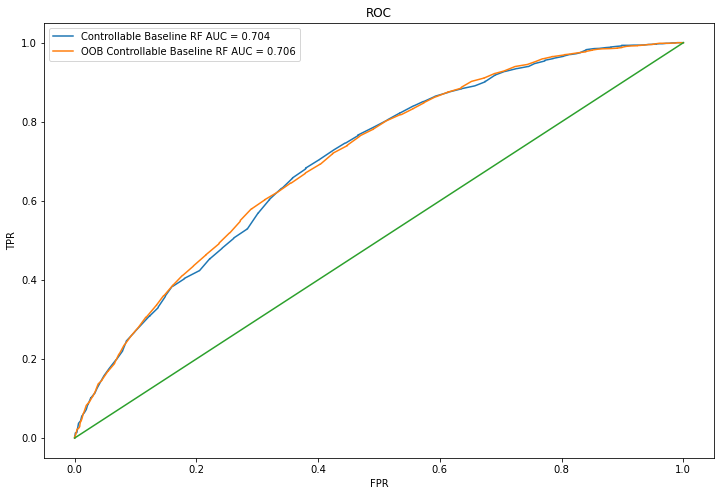

In [373]:
plt.figure(figsize=(12,8))

# baseline
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont[:,1])
auc = metrics.auc(fpr,tpr)
label = "Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

# baseline with oob error
rf_def_cont_oob = RandomForestClassifier(criterion='entropy', n_estimators=100,oob_score=True)
rf_def_cont_oob = rf_def_cont_oob.fit(train_cont.drop(['Label'], 1), train_cont['Label'])
rf_pred_cont_oob = rf_def_cont_oob.predict_proba(test_cont.drop('Label',1))
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont_oob[:,1])
auc = metrics.auc(fpr,tpr)
label = "OOB Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

### GridSearch

In [376]:
from sklearn.model_selection import RandomizedSearchCV


In [377]:
X_train = train_cont.drop('Label',1)
Y_train = train_cont.Label

In [392]:
min_samples_split_values = np.arange(100,2000,500)
min_samples_leaf_values = np.arange(1,200,50)
max_features = np.arange(1,50,20)
n_est = [160]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est,
                  rf_def__min_samples_leaf=min_samples_leaf_values,
                  rf_def__min_samples_split=min_samples_split_values)

pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def_cont)])

clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_leaf'])
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_split'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])
print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 160
Best mi_samples_leaf: 1
Best mi_samples_split: 100
Best max_features: 21

RandomForestClassifier(criterion='entropy', max_features=21,
                       min_samples_split=100, n_estimators=160)


In [405]:
rf_def = RandomForestClassifier()

n_est = np.arange(1,200,10)

parameters = dict(rf_def__n_estimators=n_est)

pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def_cont)])

clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
#print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 181


In [406]:
max_features = np.arange(1,50,100)
n_est = [181]

parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est)

pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def_cont)])

clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])
#print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 181
Best max_features: 1


In [407]:
min_samples_leaf_values = np.arange(1,200,10)
max_features = [1]
n_est = [181]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est,
                  rf_def__min_samples_leaf=min_samples_leaf_values)

pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def_cont)])

clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_leaf'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])
#print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 181
Best mi_samples_leaf: 1
Best max_features: 1


In [408]:
min_samples_split_values = np.arange(100,2000,200)
min_samples_leaf_values = [1]
max_features = [1]
n_est = [181]


# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(rf_def__max_features=max_features,
                  rf_def__n_estimators=n_est,
                  rf_def__min_samples_leaf=min_samples_leaf_values,
                  rf_def__min_samples_split=min_samples_split_values)

pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('rf_def', rf_def_cont)])

clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_leaf'])
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_split'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])
print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 181
Best mi_samples_leaf: 1
Best mi_samples_split: 100
Best max_features: 1

RandomForestClassifier(criterion='entropy', max_features=1,
                       min_samples_split=100, n_estimators=181)


In [429]:
#rf_def = RandomForestClassifier(criterion='entropy', max_features=21,
#                       min_samples_split=100, n_estimators=160)

rd_def = RandomForestClassifier(criterion='entropy', max_features=20,
                       min_samples_split=100, n_estimators=181)
rf_def = rf_def.fit(train_cont.drop(['Label'], 1), train_cont['Label'])


predictions_train=rf_def.predict(X_train)
predictions_test=rf_def.predict(test_cont.drop('Label',1))

#Compute accuracies
train_accuracy=accuracy_score(train_cont['Label'],predictions_train)
test_accuracy=accuracy_score(test_cont['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9986812358703844
Test Accuracy is 0.6510926902788244


In [ ]:
rf_pre

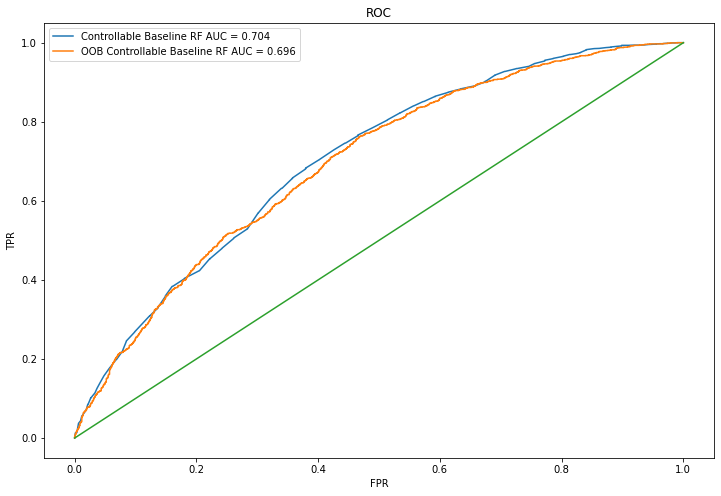

In [430]:
plt.figure(figsize=(12,8))

# baseline
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont[:,1])
auc = metrics.auc(fpr,tpr)
label = "Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

# baseline with oob error
rf_def_cont_oob = RandomForestClassifier(criterion='entropy', max_features=20,
                       min_samples_split=100, n_estimators=181,oob_score=True)
rf_def_cont_oob = rf_def_cont_oob.fit(train_cont.drop(['Label'], 1), train_cont['Label'])
rf_pred_cont_oob = rf_def_cont_oob.predict_proba(test_cont.drop('Label',1))
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont_oob[:,1])
auc = metrics.auc(fpr,tpr)
label = "OOB Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [396]:
#rf_def = RandomForestClassifier(criterion='entropy', max_features=21,
#                       min_samples_split=100, n_estimators=160)

rd_def = RandomForestClassifier(criterion='entropy',n_estimators = 160)
rf_def = rf_def.fit(train_cont.drop(['Label'], 1), train_cont['Label'])


predictions_train=rf_def.predict(X_train)
predictions_test=rf_def.predict(test_cont.drop('Label',1))

#Compute accuracies
train_accuracy=accuracy_score(train_cont['Label'],predictions_train)
test_accuracy=accuracy_score(test_cont['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.7506907812107511
Test Accuracy is 0.6360211002260738


In [404]:
rf_def = RandomForestClassifier(criterion='entropy', max_features=8,
                       min_samples_split=100, n_estimators=160)

rf_def = rf_def.fit(train_cont.drop(['Label'], 1), train_cont['Label'])


predictions_train=rf_def.predict(X_train)
predictions_test=rf_def.predict(test_cont.drop('Label',1))

#Compute accuracies
train_accuracy=accuracy_score(train_cont['Label'],predictions_train)
test_accuracy=accuracy_score(test_cont['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.74290379301683
Test Accuracy is 0.634262748053253


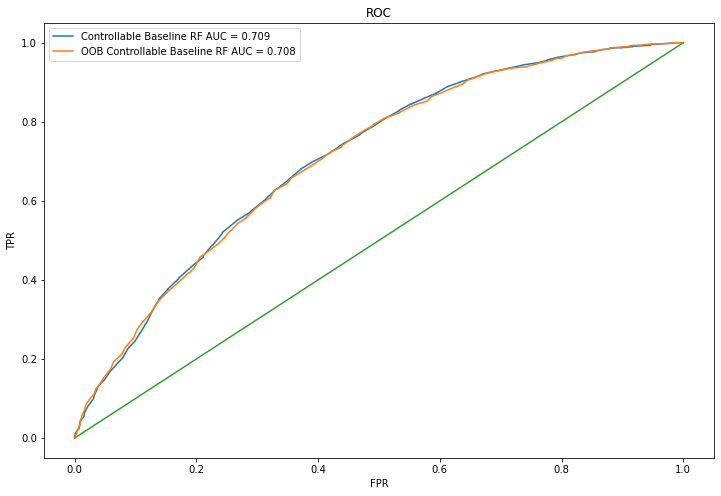

In [432]:
plt.figure(figsize=(12,8))

# baseline
rf_pred_cont = rf_def.predict_proba(test_cont.drop('Label',1))
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont[:,1])
auc = metrics.auc(fpr,tpr)
label = "Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

# baseline with oob error
rf_def_cont_oob = RandomForestClassifier(criterion='entropy', n_estimators=160,oob_score=True)
rf_def_cont_oob = rf_def_cont_oob.fit(train_cont.drop(['Label'], 1), train_cont['Label'])
rf_pred_cont_oob = rf_def_cont_oob.predict_proba(test_cont.drop('Label',1))
fpr, tpr, thresholds = metrics.roc_curve(test_cont['Label'], rf_pred_cont_oob[:,1])
auc = metrics.auc(fpr,tpr)
label = "OOB Controllable Baseline RF AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

# III. Testing: One Model, One Dataset

In [202]:
url = 'https://raw.githubusercontent.com/audreychu/Airbnb_Optimization/main/Faizan_scratch/Controllables/one_full_cleaned_features2.csv'
one = pd.read_csv(url, index_col='id')

In [203]:
one.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,...,Amenties Include parking,Amenties Include Pets,Amenties Include Dishes and silverware,Amenties Include Coffee maker,Amenties Include Microwave,Amenties Include Refrigerator,offers_weekly_price,offers_monthly_price,charges_security_deposit,charges_cleaning_fee
id,,,,,,,,,,,,,,,,,,,,,
5435.0,100.000000,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,145.0,...,0,1,1,1,1,1,0,1,1,1
20311.0,100.000000,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,70.0,...,0,0,0,0,0,0,1,1,1,1
27024.0,100.000000,1.0,1.0,1.0,1.0,4.0,1.0,1.0,3.0,150.0,...,0,0,0,0,0,0,1,1,1,1
62264.0,100.000000,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,65.0,...,1,0,0,0,0,0,1,1,1,1
70381.0,93.247853,0.0,1.0,1.0,0.0,5.0,2.0,3.0,3.0,450.0,...,0,1,0,0,0,0,0,0,0,1


In [219]:
#foursquare
url_foursquare = 'https://raw.githubusercontent.com/audreychu/Airbnb_Optimization/main/datasets/listings_with_poifeats.csv'
df_foursquare = pd.read_csv(url_foursquare)
df_foursquare = df_foursquare[['id','idpop_local_sum', 'idpop_citywide_sum',
       'idpop_local_food_sum', 'idpop_citywide_food_sum',
       'idpop_local_nightlife_sum', 'idpop_citywide_nightlife_sum',
       'idpop_local_travel_sum', 'idpop_citywide_travel_sum',
       'venue_count_500m']]

#subways
url_sub = 'https://raw.githubusercontent.com/audreychu/Airbnb_Optimization/main/datasets/df_subway_stations.csv'
df_sub = pd.read_csv(url_sub)
df_sub = df_sub[['id','sub_cnt_20m','sub__line_cnt_20m']]

#comp
url_comp = 'https://raw.githubusercontent.com/audreychu/Airbnb_Optimization/main/datasets/airbnb_comp.csv'
df_comp = pd.read_csv(url_comp)
df_comp = df_comp[['id','comp','comp_hotel']]

/Users/audreychu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/audreychu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [241]:
join1 = one.merge(df_foursquare,on='id',how='inner')
join2 = join1.merge(df_sub,on='id',how='inner')
final_df = join2.merge(df_comp,on='id',how='inner')
final_df = final_df.set_index('id')
final_df = final_df.drop('host_is_superhost',1)

In [242]:
final_df.shape

(39801, 100)

In [243]:
train,test = train_test_split(final_df, train_size=.80)

rf_def = RandomForestClassifier()
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])
rf_pred = rf_def.predict_proba(test.drop('Label',1))

#Make predictions for both training and test data
predictions_train=rf_def.predict(train.drop(['Label'], 1))
predictions_test=rf_def.predict(test.drop(['Label'], 1))

#Compute accuracies
train_accuracy=accuracy_score(train['Label'],predictions_train)
test_accuracy=accuracy_score(test['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 1.0
Test Accuracy is 0.6575807059414647


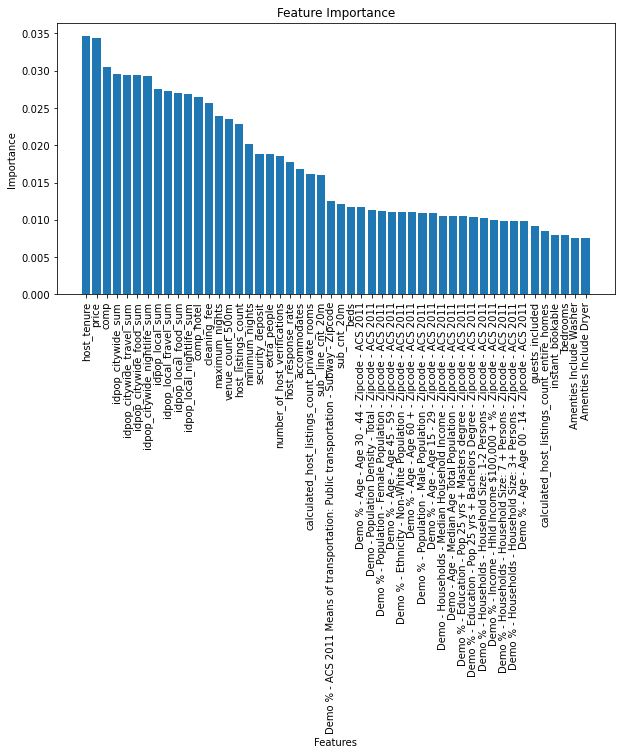

In [244]:
#Get feature importances
feature_mi = rf_def.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(train.drop('Label',1).columns.values[featureinds[::-1][0:50]],feature_mi[featureinds[::-1][0:50]])
plt.xticks(train.drop('Label',1).columns.values[featureinds[::-1][0:50]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [109]:
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['rf_def__n_estimators'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_leaf'])
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['rf_def__min_samples_split'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['rf_def__max_features'])
print(); print(clf_GS.best_estimator_.get_params()['rf_def'])

Best n_estimators: 200
Best mi_samples_leaf: 20
Best mi_samples_split: 1000
Best max_features: 11

RandomForestClassifier(max_features=11, min_samples_leaf=20,
                       min_samples_split=1000, n_estimators=200)


In [128]:
#Make predictions for both training and test data
#rf_def = RandomForestClassifier(max_features=11, min_samples_leaf=20, min_samples_split=1000, n_estimators=200)
rf_def = RandomForestClassifier(n_estimators = 100,max_features=15)
rf_def = rf_def.fit(train.drop(['Label'], 1), train['Label'])

predictions_train=rf_def.predict(train.drop(['Label'], 1))
predictions_test=rf_def.predict(test.drop(['Label'], 1))

#Compute accuracies
train_accuracy=accuracy_score(train['Label'],predictions_train)
test_accuracy=accuracy_score(test['Label'],predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9998754204559611
Test Accuracy is 0.5490782262082711
